In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
from PIL import Image

In [2]:
def create_artboard(rows, cols):
    return np.zeros([rows, cols])

def create_empty_target(rows, cols):
    return np.zeros([rows, cols])

In [11]:
# Initialize sheapeg

sheapeg = Image.open('shea-coulee.png').convert('L')

basewidth = 300
img = sheapeg
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
sheapeg_small = img.resize((basewidth,hsize), Image.ANTIALIAS)
sheapeg = sheapeg_small
shea = np.asarray(sheapeg)

shea.shape

(198, 300)

In [580]:
def process_pic(image_path, target_width=300):
    
#     open image and convert to grayscale. image can be jpeg or png
    processed_pic = Image.open(image_path).convert('L')

#     resize image to match specified width while maintaining ratio
    basewidth = target_width
    wpercent = (basewidth/float(processed_pic.size[0]))
    hsize = int((float(processed_pic.size[1])*float(wpercent)))
    processed_pic = processed_pic.resize((basewidth, hsize), Image.ANTIALIAS)
    
#     convert to numpy array
    processed_pic = np.asarray(processed_pic)
    
    print('shape:', processed_pic.shape)
    
    return processed_pic

# topoimage = Image.open('jeff-topo-pic.jpg').convert('L')
# basewidth = 500
# img = topoimage
# wpercent = (basewidth/float(img.size[0]))
# hsize = int((float(img.size[1])*float(wpercent)))
# topo_small = img.resize((basewidth,hsize), Image.ANTIALIAS)
# topoimage = topo_small
# topo = np.asarray(topoimage)

# topo.shape

In [3]:
def add_random_square(artboard):
    
    neighbor_positions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]
    
    rows = len(artboard)
    cols = len(artboard[0])

    ## pick a random cell in the artboard that is not on the border
    random_row = random.randint(1, rows - 2)
    random_col = random.randint(1, cols - 2)

    ## modify all of its neighbors
    for relative_position in neighbor_positions:
        absolute_row = relative_position[0] + random_row
        absolute_col = relative_position[1] + random_col
#         if artboard[absolute_row][absolute_col] < 1:
        if artboard[absolute_row][absolute_col] < 215:
#             artboard[absolute_row][absolute_col] += 0.1
            artboard[absolute_row][absolute_col] += 40
    
    return artboard


In [4]:
def add_random_variable_rectangle(artboard, rect_rows, rect_cols):
    
#     get relative locations of all values to be written, where 0, 0 is top left location
    cell_positions_from_top_left = []
    
    for i in range(rect_rows):
        for j in range(rect_cols):
            cell_positions_from_top_left.append((i, j))

    artboard_rows = len(artboard)
    artboard_cols = len(artboard[0])

    ## pick a random cell in the artboard that is not on the border
    random_row = random.randint(0, artboard_rows - rect_rows)
    random_col = random.randint(0, artboard_cols - rect_cols)

    ## modify all of its neighbors
    for relative_position in cell_positions_from_top_left:
        absolute_row = relative_position[0] + random_row
        absolute_col = relative_position[1] + random_col
#         if artboard[absolute_row][absolute_col] < 1:
        if artboard[absolute_row][absolute_col] < 215:
#             artboard[absolute_row][absolute_col] += 0.1
            artboard[absolute_row][absolute_col] += 40
    
    return artboard

In [17]:
def draw(artboard, target, rect_rows, rect_cols, iterations):
    """generate a number (iterations) of artboards with random shapes drawn and pick the highest scoring one to keep"""
    
    result = copy.deepcopy(artboard)
    
#     get current artboard score to evaluate against
    current_score = score(artboard, target)
    count_added = 0
    
    for i in range(iterations):
    #     create a temporary artboard
        temp_artboard = copy.deepcopy(result)
        
    #     add random rectangle to temp artboard
        add_random_variable_rectangle(temp_artboard, rect_rows=rect_rows, rect_cols=rect_cols)
        
    #     see if that square made an improvement. if so, assign temp_artboard to artboard
        if score(temp_artboard, target) > current_score:
            result = copy.deepcopy(temp_artboard)
            current_score = score(temp_artboard, target)
            count_added += 1
    
    print('previous score: ', score(artboard, target))
    print('current score: ', current_score)
    print('total added: ', count_added)
    print('percent improvement: ', ((1 - current_score/score(artboard, target)) * 100))
    
    return result
        

In [18]:
def score(artboard, target):
    
    score = 0
    max_score = len(artboard) * len(artboard[0])
    
    rows = len(artboard)
    cols = len(artboard[0])
    
    if rows != len(target) or cols != len(target[0]):
        return 'target and artboard are not the same size!'
    
    summed_difference = 0
    
    for i, row in enumerate(artboard):
        for j, col in enumerate(row):
            summed_difference += abs(artboard[i][j] - target[i][j])
    
#     for pair in change_locations:
#         summed_difference += abs(artboard[pair[0]][pair[1]] - target[pair[0]][pair[1]])
    
    score = max_score - summed_difference
    
#     BEWARE! little validation was done on this funciton - is this summing the differences as expected?
    
    return score

Let's make some art!

In [727]:
tim_pic = process_pic('tim_trees.jpg')

('shape:', (225, 300))


In [728]:
tim_artboard = create_artboard(225, 300)

In [756]:
tim_artboard = draw(artboard=tim_artboard, target=tim_pic, rect_rows=2, rect_cols=2, iterations=1000)

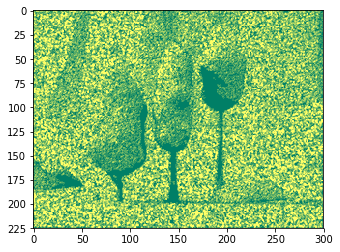

In [770]:
plt.imshow(tim_artboard, cmap="summer")

In [769]:
for i, row in enumerate(tim_artboard):
    for j, value in enumerate(row):
        tim_artboard[i][j] = 255 - value

# New functions - not working yet

In [584]:
def add_random_variable_rectangle_and_report_change_locations(artboard, rect_rows, rect_cols):
    
#     get relative locations of all values to be written, where 0, 0 is top left location
    cell_positions_from_top_left = []
    
    for i in range(rect_rows):
        for j in range(rect_cols):
            cell_positions_from_top_left.append((i, j))

    artboard_rows = len(artboard)
    artboard_cols = len(artboard[0])

    ## pick a random cell in the artboard that is not on the border
    random_row = random.randint(0, artboard_rows - rect_rows)
    random_col = random.randint(0, artboard_cols - rect_cols)

    ## modify and record locations of all of its neighbors
    locations = []
    for relative_position in cell_positions_from_top_left:
        absolute_row = relative_position[0] + random_row
        absolute_col = relative_position[1] + random_col
        if artboard[absolute_row][absolute_col] < 215:
            artboard[absolute_row][absolute_col] += 40
            locations.append((absolute_row, absolute_col))
            
    
    return artboard, locations

In [585]:
def draw(artboard, target, rect_rows, rect_cols, iterations):
    """generate a number (iterations) of artboards with random shapes drawn and pick the highest scoring one to keep"""
    
    result = copy.deepcopy(artboard)
#     print('copied artboard')
    
#     get current artboard score to evaluate against
#     current_score = score(artboard, target)
    count_added = 0
    
    for i in range(iterations):
#         print('iterating')
        
    #     create a temporary artboard
        temp_artboard = copy.deepcopy(result)
        
    #     add random rectangle to temp artboard
        temp_artboard, locations = add_random_variable_rectangle_and_report_change_locations(temp_artboard, rect_rows=rect_rows, rect_cols=rect_cols)
        
    #     see if that square made an improvement. if so, assign temp_artboard to artboard
#         if score(temp_artboard, target, locations) > current_score:
        if score(temp_artboard, target, locations) > score(artboard, target, locations):
#             print('random addition is improvement')
            result = copy.deepcopy(temp_artboard)
            current_score = score(temp_artboard, target, locations)
            count_added += 1
    
#     print('previous score: ', score(artboard, target))
#     print('current score: ', current_score)
#     print('total added: ', count_added)
#     print('percent improvement: ', ((1 - current_score/score(artboard, target)) * 100))
    
    return result

In [586]:
def score(artboard, target, locations=None):
    
#     print('scoring')
    
    score = 0
    max_score = len(artboard) * len(artboard[0])
#     max score is one point per cell
    
    rows = len(artboard)
    cols = len(artboard[0])
    
    if rows != len(target) or cols != len(target[0]):
#         print('errorrr')
        return 'target and artboard are not the same size!'
    
    total_percent_difference = 0
    
#     for each cell, calculate percent difference between target and artboard by taking min(target, artboard)/max(target, artboard)
    
    if not locations:
#         print('no locations!')
        for i, row in enumerate(artboard):
            for j, col in enumerate(row):
                target_value = target[i][j]
                artboard_value = artboard[i][j]
#                 total_percent_difference = abs(target_value - artboard_value)/target_value
#                 total_percent_difference += min(target_value, artboard_value)/max(target_value, artboard_value)
#                 print(target_value, artboard_value)
                squared_difference = (target_value - artboard_value)**2
    else:
#         print('got locations')
        for pair in locations:
#             print('scoring', pair)
            target_value = target[pair[0]][pair[1]]
            artboard_value = artboard[pair[0]][pair[1]]
#             total_percent_difference += abs(artboard[pair[0]][pair[1]] - target[pair[0]][pair[1]])
#             total_percent_difference += (1 - abs(artboard[pair[0]][pair[1]] - target[pair[0]][pair[1]])/255)
#             print('TPD: ', total_percent_difference)
            squared_difference = (artboard[pair[0]][pair[1]] - target[pair[0]][pair[1]])**2
    
    score = squared_difference * -1
    
#     print(score)
    
    return score

In [523]:
zartboard = create_artboard(198, 300)

In [524]:
ztarget = shea

In [557]:
zartboard = draw(artboard=zartboard, target=ztarget, iterations=1000, rect_cols=1, rect_rows=2)

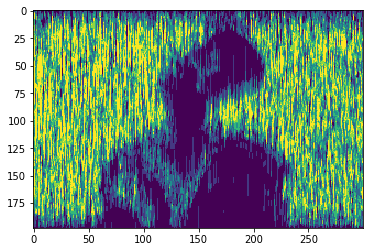

In [558]:
plt.imshow(zartboard)

In [284]:
new_artboard = create_artboard(10, 15)

In [285]:
new_target = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 200., 200., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 200., 200., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 200., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 200., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 200., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 200., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 200., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

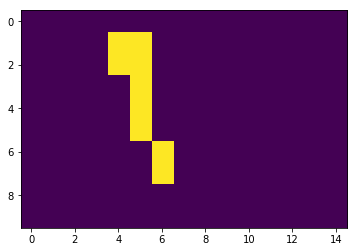

In [286]:
plt.imshow(new_target)

In [289]:
new_target.shape

(10, 15)

In [290]:
new_artboard.shape

(10, 15)

In [297]:
new_artboard = draw(artboard=new_artboard, target=new_target, iterations=10, rect_cols=2, rect_rows=2)

copied artboard
iterating
got locations
('scoring', (4, 7))
('scoring', (4, 8))
('scoring', (5, 7))
('scoring', (5, 8))
got locations
('scoring', (4, 7))
('scoring', (4, 8))
('scoring', (5, 7))
('scoring', (5, 8))
iterating
got locations
('scoring', (6, 7))
('scoring', (6, 8))
('scoring', (7, 7))
('scoring', (7, 8))
got locations
('scoring', (6, 7))
('scoring', (6, 8))
('scoring', (7, 7))
('scoring', (7, 8))
iterating
got locations
('scoring', (4, 8))
('scoring', (4, 9))
('scoring', (5, 8))
('scoring', (5, 9))
got locations
('scoring', (4, 8))
('scoring', (4, 9))
('scoring', (5, 8))
('scoring', (5, 9))
iterating
got locations
('scoring', (7, 4))
('scoring', (7, 5))
('scoring', (8, 4))
('scoring', (8, 5))
got locations
('scoring', (7, 4))
('scoring', (7, 5))
('scoring', (8, 4))
('scoring', (8, 5))
iterating
got locations
('scoring', (8, 7))
('scoring', (8, 8))
('scoring', (9, 7))
('scoring', (9, 8))
got locations
('scoring', (8, 7))
('scoring', (8, 8))
('scoring', (9, 7))
('scoring', (9

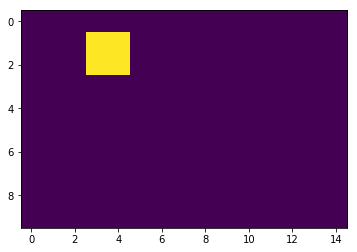

In [298]:
plt.imshow(new_artboard)